# This script contains the followings:
- Import libraries & load dataset
- Create new flags
- Exploratory visual analysis
- Property type questions answered
- Hypothesis
- Export
 

# Import libraries & load daataset

In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [87]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A6_Data immersion/02_data'
file_path = os.path.join(path,'prepared_data','transactions_V1') 

# Load file from pickle
df = pd.read_pickle(file_path)

In [88]:
df.shape

(7574526, 15)

In [89]:
round(df.describe(),2)

,id_transaction,price,id_city,postcode,n_rooms,living_area,latitude,longitude,price_m2
count,7574526.00,7.574526e+06,7574526.00,7574526.00,7574526.00,7574526.00,7574526.00,7574526.00,7574526.00
mean,6723698.99,2.279238e+05,208.53,53294.64,3.53,81.98,46.32,2.38,3039.67
std,3897515.95,1.811245e+06,172.60,27677.74,1.54,42.57,5.86,6.23,17134.34
min,2.00,4.500000e+03,1.00,1000.00,0.00,9.00,-21.39,-63.15,500.00
25%,3304322.50,1.100000e+05,71.00,31300.00,2.00,53.00,44.76,0.60,1527.78
50%,6692909.50,1.700000e+05,166.00,56400.00,3.00,76.00,47.24,2.38,2342.34
75%,10174277.75,2.625000e+05,300.00,77100.00,4.00,101.00,48.84,4.61,3600.65
max,13067339.00,3.300000e+09,909.00,97490.00,112.00,1640.00,51.08,55.83,25781250.00


# Create new flags
- change date_transaction to date data type
- create year column from date
- create avg price/m2 per department
- create avg price per department
- create building type based of numbers of rooms


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7574526 entries, 0 to 7810683
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id_transaction    int32         
 1   date_transaction  datetime64[ns]
 2   price             float64       
 3   id_city           int32         
 4   city              object        
 5   postcode          int32         
 6   adresse           object        
 7   departement       object        
 8   building_type     object        
 9   vefa              bool          
 10  n_rooms           int32         
 11  living_area       int32         
 12  latitude          float64       
 13  longitude         float64       
 14  price_m2          float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int32(5), object(4)
memory usage: 729.6+ MB


In [91]:
# create year column from date
df['year'] = df['date_transaction'].dt.year


In [92]:
df.head()

,id_transaction,date_transaction,price,id_city,city,postcode,adresse,departement,building_type,vefa,n_rooms,living_area,latitude,longitude,price_m2,year
0,332948,2014-01-02,173020.0,202,LAGNIEU,1150,21 GR GRANDE RUE DE BULLIEZ,01,Maison,False,4,72,45.899056,5.354210,2403.055556,2014
1,328900,2014-01-02,157500.0,451,VIRIAT,1440,1369 RTE DE STRASBOURG,01,Maison,False,4,103,46.236407,5.262935,1529.126214,2014
2,326170,2014-01-02,112000.0,365,SAINT-JEAN-SUR-VEYLE,1290,5174 SAINT JEAN SUR VEYLE,01,Maison,False,3,78,46.260087,4.918587,1435.897436,2014
3,328585,2014-01-02,197000.0,427,TREVOUX,1600,6346 MTE DES LILAS,01,Appartement,False,4,84,45.942301,4.770694,2345.238095,2014
4,335040,2014-01-03,126000.0,283,OYONNAX,1100,29B RUE DE LA FORGE,01,Appartement,False,4,111,46.258411,5.640810,1135.135135,2014


## create avg price/m2 per department

In [93]:
# Calculate the average price per square meter
avg_price_m2 = df['price_m2'].mean()

# Group by 'department' and calculate the average price per square meter
average_price_per_m2_by_departement = df.groupby('departement')['price_m2'].mean().reset_index()

# Display the result
round(average_price_per_m2_by_departement)

,departement,price_m2
0,01,2622.0
1,02,1344.0
2,03,1282.0
3,04,2136.0
4,05,2453.0
...,...,...
90,95,3474.0
91,971,3025.0
92,972,2758.0
93,973,2829.0


## create avg price per department

In [94]:
# Group by 'department' and calculate the average price
average_price_per_departement = df.groupby('departement')['price'].mean().reset_index()

# Display the result
round(average_price_per_departement)


,departement,price
0,01,246190.0
1,02,124852.0
2,03,112680.0
3,04,155969.0
4,05,152673.0
...,...,...
90,95,258119.0
91,971,209864.0
92,972,201504.0
93,973,211213.0


# Create a studio house type with conditions:
we will define studio as: n_room = 0 , building type = Appartement, living_area <=30
The rest of properties with n_room = 0, living_area > 30, building_type = Maison will be excluded

In [95]:
non_studio = df[(df['n_rooms'] == 0) & (df['living_area'] > 30)]
non_studio.count()

id_transaction      9939
date_transaction    9939
price               9939
id_city             9939
city                9939
postcode            9939
adresse             9939
departement         9939
building_type       9939
vefa                9939
n_rooms             9939
living_area         9939
latitude            9939
longitude           9939
price_m2            9939
year                9939
dtype: int64

In [96]:
# count the values not considered as a studio
count_condition = ((df['n_rooms'] == 0) & (df['living_area'] > 30)).sum()
count_condition

9939

In [97]:
# remove it from dataframe
df = df[~((df['n_rooms'] == 0) & (df['living_area'] > 30))]


In [98]:
# Checking rows removed
df_nostud = df[(df['n_rooms'] == 0) & (df['living_area'] > 30)]
df_nostud



,id_transaction,date_transaction,price,id_city,city,postcode,adresse,departement,building_type,vefa,n_rooms,living_area,latitude,longitude,price_m2,year


# create building type based of numbers of rooms

In [99]:
# Define the bins and labels for the building types
bins = [0 ,1, 2, 3, 4, 5, 6, float('inf')]
labels = ['Studio','T1', 'T2', 'T3', 'T4', 'T5','T5+']

# Create a new column 'house_type' based on the 'n_rooms' column
df['house_type'] = pd.cut(df['n_rooms'], bins=bins, labels=labels, right=False)


In [100]:
# Group by 'building_type' and calculate statistics for 'n_rooms'
grouped_data = df.groupby('house_type').count()
grouped_data

,id_transaction,date_transaction,price,id_city,city,postcode,adresse,departement,building_type,vefa,n_rooms,living_area,latitude,longitude,price_m2,year
house_type,,,,,,,,,,,,,,,,
Studio,4244,4244,4244,4244,4244,4244,4244,4244,4244,4244,4244,4244,4244,4244,4244,4244
T1,624451,624451,624451,624451,624451,624451,624451,624451,624451,624451,624451,624451,624451,624451,624451,624451
T2,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406,1295406
T3,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057,1878057
T4,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323,1959323
T5,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727,1148727
T5+,654379,654379,654379,654379,654379,654379,654379,654379,654379,654379,654379,654379,654379,654379,654379,654379


# Exploratory visual analysis
- Correlation matrix & heatmap
- Scatterplot (or plots) for the variables with the strongest correlations
- Pair plot of the entire data set
- Categorical plot

In [101]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix


,id_transaction,price,id_city,postcode,vefa,n_rooms,living_area,latitude,longitude,price_m2,year
id_transaction,1.000000,0.016876,-0.049145,0.995418,0.063141,-0.036599,-0.062813,0.015229,0.005596,0.033432,-0.061782
price,0.016876,1.000000,-0.010446,0.016926,0.002323,0.038190,0.053702,0.003209,0.002408,0.950055,0.009628
id_city,-0.049145,-0.010446,1.000000,-0.045440,-0.000178,0.086443,0.068959,0.180574,-0.015003,-0.022742,0.000116
postcode,0.995418,0.016926,-0.045440,1.000000,0.056981,-0.030721,-0.057670,0.014605,-0.002447,0.032871,-0.007450
vefa,0.063141,0.002323,-0.000178,0.056981,1.000000,-0.118066,-0.119925,-0.005707,0.013635,0.015592,-0.102233
n_rooms,-0.036599,0.038190,0.086443,-0.030721,-0.118066,1.000000,0.803114,0.045269,-0.037872,-0.031337,0.019988
living_area,-0.062813,0.053702,0.068959,-0.057670,-0.119925,0.803114,1.000000,0.025459,-0.034639,-0.029168,0.027365
latitude,0.015229,0.003209,0.180574,0.014605,-0.005707,0.045269,0.025459,1.000000,-0.320022,0.005537,0.001771
longitude,0.005596,0.002408,-0.015003,-0.002447,0.013635,-0.037872,-0.034639,-0.320022,1.000000,0.005195,0.000428
price_m2,0.033432,0.950055,-0.022742,0.032871,0.015592,-0.031337,-0.029168,0.005537,0.005195,1.000000,0.010978


### NOTE: 
0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
-0.5– -1.0: strong negative relationship like latitude & departement. whe ngoes up, the other one goes down
0.5–1.0: strong postive relationship: like living area & n_rooms

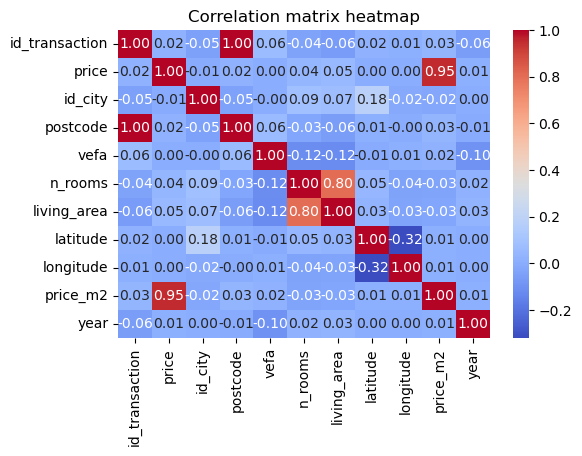

In [102]:
plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix heatmap")
plt.show()


Text(0.5, 1.0, 'Scatter Plot of living area vs. number of rooms')

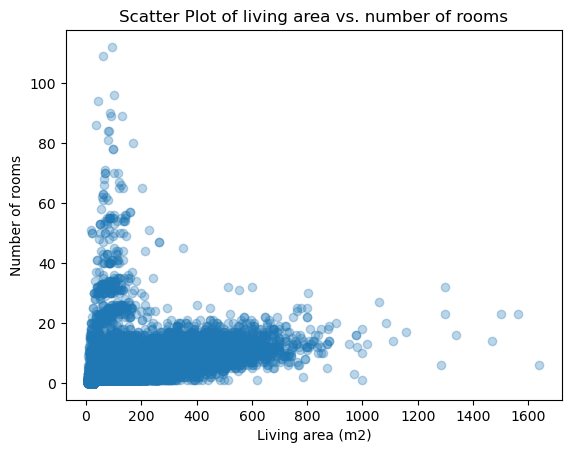

In [104]:
# Create a scatter plot
plt.scatter(df['living_area'], df['n_rooms'], alpha=0.3)  # alpha controls point transparency

# Add labels and a title
plt.xlabel('Living area (m2)')
plt.ylabel('Number of rooms')
plt.title('Scatter Plot of living area vs. number of rooms')

### Note: Observation relationship living area-numbers of room
We can see that even when the  living area increases, the numbers of rooms doesn't necessarily increase a lot and stay beyond 20 rooms

In [ ]:
# Generate summary statistics for 'living_area'
living_area_stats = df['living_area'].describe()

# Generate summary statistics for 'n_rooms'
n_rooms_stats = df['n_rooms'].describe()

print(living_area_stats)
print(n_rooms_stats)

count    7.564587e+06
mean     8.192114e+01
std      4.238027e+01
min      9.000000e+00
25%      5.300000e+01
50%      7.600000e+01
75%      1.010000e+02
max      1.640000e+03
Name: living_area, dtype: float64
count    7.564587e+06
mean     3.535128e+00
std      1.533093e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      1.120000e+02
Name: n_rooms, dtype: float64


## Pair plot of the sub data set

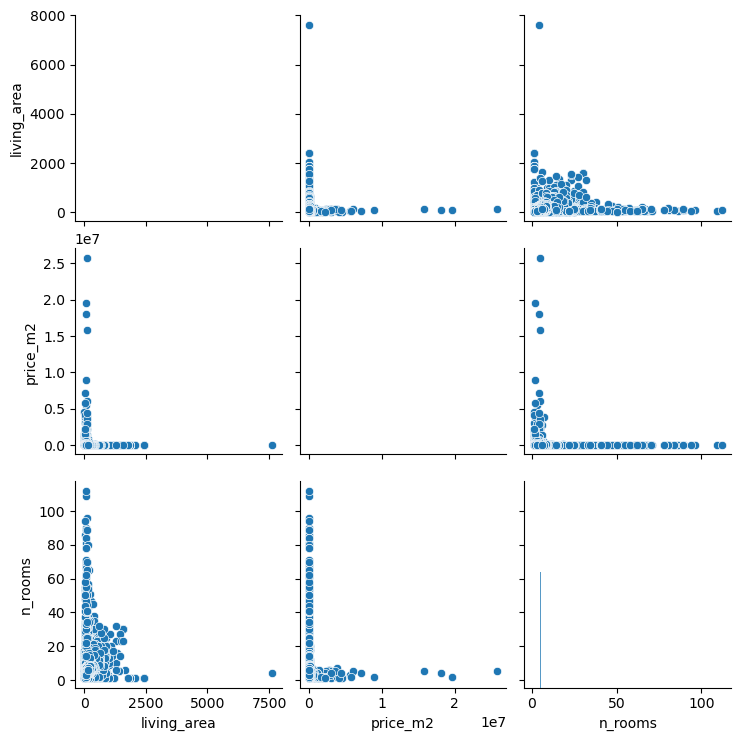

In [ ]:
# Select a subset of variables
subset_vars = ['living_area', 'price_m2', 'n_rooms']

# Create a pair plot with the selected variables
sns.pairplot(df[subset_vars])

# Show the plot
plt.show()


### NOTE: We can see that with the numbers of room going up, the living area is reducing. This is odd and nneds further exploration. There is also some outliers I want to explore with high livinmg area but with few rooms and price per sqaure metter close to 0.

## Categorical plot

Text(0.5694444444444446, 0.5, 'Count')

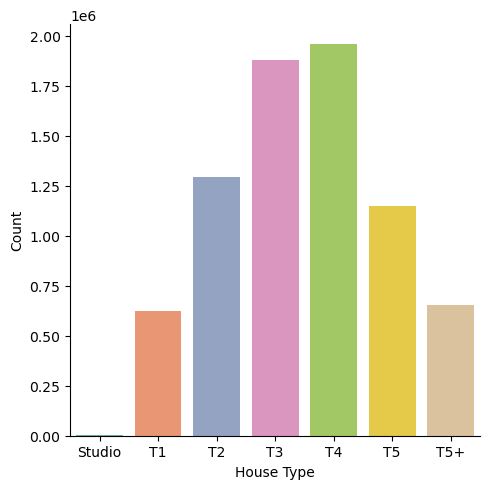

In [ ]:
# Create a categorical plot to show the count of a variable in different categories
sns.catplot(x="house_type", kind="count", data=df, palette="Set2")

# Add labels and a title
plt.xlabel("House Type")
plt.ylabel("Count")

### NOTE: Repartition of house type
We see clearly that houses & flats with 3 or 4 rooms are the most exchanged on the french market between 2014 & 2022


In [ ]:
# Counts of building types
house_type_counts = df['house_type'].value_counts()
house_type_counts

T4        1959323
T3        1878057
T2        1295406
T5        1148727
T5+        654379
T1         624451
Studio       4244
Name: house_type, dtype: int64

In [105]:
# Calculate the percentage of each building type
house_type_percentage = (house_type_counts / house_type_counts.sum()) * 100
round(house_type_percentage,2)


T4        25.90
T3        24.83
T2        17.12
T5        15.19
T5+        8.65
T1         8.25
Studio     0.06
Name: house_type, dtype: float64

Text(0.5, 1.0, 'Number of Transactions by Building Type')

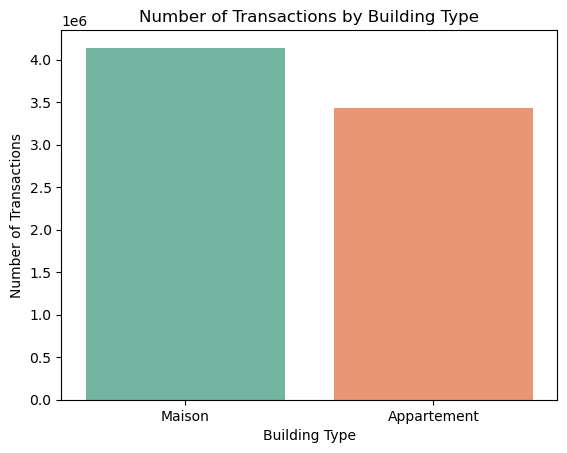

In [118]:
# Calculate the count of transactions for each building type
building_type_counts = df['building_type'].value_counts()

# Create a bar plot
sns.barplot(x=building_type_counts.index, y=building_type_counts.values, palette="Set2")

# Add labels and a title
plt.xlabel('Building Type')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Building Type')

In [106]:
# Group the data by 'year' and count the number of transactions in each year
transactions_per_year = df['date_transaction'].dt.year.value_counts().sort_index()

# Display the number of transactions per year
print(transactions_per_year)


2014     618955
2015     706235
2016     756355
2017     877032
2018     871932
2019     948112
2020     911950
2021    1039742
2022     834274
Name: date_transaction, dtype: int64


Text(0.5, 1.0, 'Number of transactions per year')

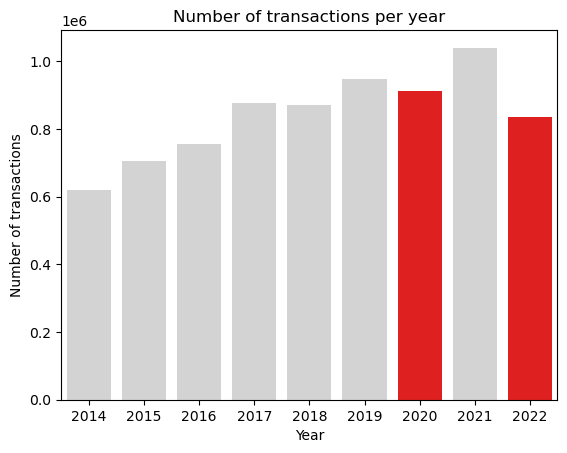

In [107]:
# Create a list of colors for each year
colors = ['lightgrey' if year not in [2020, 2022] else 'red' for year in transactions_per_year.index]

# Create the bar plot
sns.barplot(x=transactions_per_year.index, y=transactions_per_year.values, palette=colors)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Number of transactions')
plt.title('Number of transactions per year')

In [108]:
max_date = df['date_transaction'].max()
max_date

Timestamp('2022-12-31 00:00:00')

### NOTE: we have records until the end of 2022

# Property type Questions
- How the number of rooms affect the property price? 
the numbers of rooms is not positively correlated to the price per square meter

- What kind of property is the most exchanged on the market?
between 2014 & 2022, Houses represents 55 % & apartement 45 %

-  What is the evolution of price based on type of building?
we need to see the evolution overtime

# Hypothesis
- the numbers of room doesn't affect the price per square meter
- Appartement have higher transactions recorded but houses have a hihger price per square meter

- if a property is located to an area where there is a lot of transactions, then the price per square meter will be higher
- if there is a crisis like covid pandemic or Ukrainian war, the property transactions dropp significattivly


In [109]:
df.shape

(7564587, 17)

# Export

In [110]:
# export in pickle
df.to_pickle(os.path.join(path,'prepared_data', 'transactions_V2'))